In [1]:
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow .keras.optimizers import RMSprop
from tensorflow.keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical

In [2]:
model=Sequential()

model.add(Conv2D(filters=16, kernel_size=(5, 5), activation="relu",input_shape = (256,256,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=1, activation='sigmoid'))

In [3]:
image_gen = ImageDataGenerator(rescale=1./255, shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

In [4]:
train_data_gen = image_gen.flow_from_directory(batch_size=3,
                                               directory='train',
                                               shuffle=True,
                                               target_size=(256, 256))

Found 202 images belonging to 2 classes.


In [5]:
val_data_gen = image_gen.flow_from_directory(batch_size=3,
                                               directory='Validation',
                                               shuffle=True,
                                               target_size=(256, 256))

Found 96 images belonging to 2 classes.


In [7]:
model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

In [8]:
history = model.fit_generator(
    train_data_gen,
    epochs=15,
    validation_data= val_data_gen)

Epoch 1/15


c:\Users\Rinew\anaconda3\envs\Tensorflow_CPU\lib\site-packages\ipykernel_launcher.py:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  after removing the cwd from sys.path.


68/68 [==============================] - 15s 201ms/step - loss: 0.7236 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/15
68/68 [==============================] - 13s 193ms/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/15
68/68 [==============================] - 13s 198ms/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/15
68/68 [==============================] - 13s 196ms/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/15
68/68 [==============================] - 14s 201ms/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 6/15
68/68 [==============================] - 14s 204ms/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 7/15
68/68 [==============================] - 14s 200ms/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 8/15

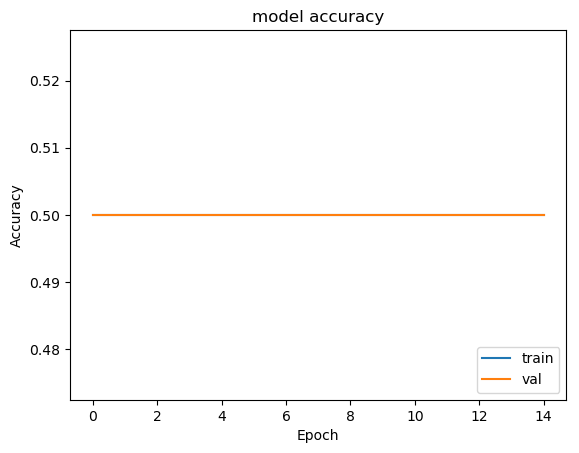

In [9]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train','val'],loc = 'lower right')
plt.show()